## Dataset Description

The dataset consists of all kinds of categorical variables:
- Nominal: the order is not important (male, female)
- Ordinal: the order is important (novice, expert, contribute)
- Cyclical: days, months
- Binary

Overall, there are:
- Five binary variables
- Ten nominal variables
- Six ordinal variables
- Two cyclic variables
- And a target variable

For categories that are in text we need to convert them into numbers.

In [22]:
# Import Libraries
import pandas as pd
import numpy as np
from sklearn import preprocessing

## Graphs
import matplotlib.pyplot as plt
import seaborn as sns

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [16]:
# Read dataset
df = pd.read_csv('../input/cat_train.csv')

In [5]:
df.head()

,id,bin_0,bin_1,bin_2,bin_3,bin_4,nom_0,nom_1,nom_2,nom_3,...,nom_9,ord_0,ord_1,ord_2,ord_3,ord_4,ord_5,day,month,target
0,0,0.0,0.0,0.0,F,N,Red,Trapezoid,Hamster,Russia,...,02e7c8990,3.0,Contributor,Hot,c,U,Pw,6.0,3.0,0
1,1,1.0,1.0,0.0,F,Y,Red,Star,Axolotl,NaN,...,f37df64af,3.0,Grandmaster,Warm,e,X,pE,7.0,7.0,0
2,2,0.0,1.0,0.0,F,N,Red,NaN,Hamster,Canada,...,NaN,3.0,NaN,Freezing,n,P,eN,5.0,9.0,0
3,3,NaN,0.0,0.0,F,N,Red,Circle,Hamster,Finland,...,f9d456e57,1.0,Novice,Lava Hot,a,C,NaN,3.0,3.0,0
4,4,0.0,NaN,0.0,T,N,Red,Triangle,Hamster,Costa Rica,...,c5361037c,3.0,Grandmaster,Cold,h,C,OZ,5.0,12.0,0


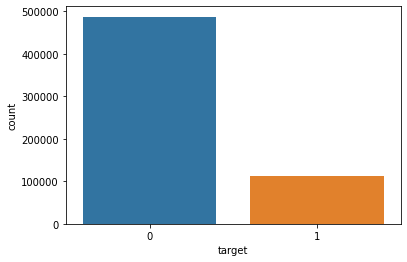

In [9]:
sns.countplot(df.target)
plt.show()

This is a **binary classification** and the target variavel is skewed. The best metric for this binary classification is AUC.

In [12]:
val_ord2 = df['ord_2'].unique()
val_ord2 

array(['Hot', 'Warm', 'Freezing', 'Lava Hot', 'Cold', 'Boiling Hot', nan],
      dtype=object)

 We can see in the ord_2 feature there are SIX categories (nan is not a category). We can map them from 0 to 5.
 This type of enconding categorical variables is known as **Label Enconding**, i.e.,
we are encoding every category as a numerical label

In [17]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [18]:
mapping = {
    "Freezing": 0,
    "Warm": 1,
    "Cold": 2,
    "Boiling Hot": 3,
    "Hot": 4,
    "Lava Hot": 5
}

In [19]:
df.loc[:, 'ord_2'] = df.ord_2.map(mapping)
df.ord_2.value_counts()

0.0    142726
1.0    124239
2.0     97822
3.0     84790
4.0     67508
5.0     64840
Name: ord_2, dtype: int64

We can do the same using LabelEnconder from sklearn

In [24]:
# Read dataset
df = pd.read_csv('../input/cat_train.csv')

# fill NaN values in ord_2 column to be able use LabelEncoder
df.loc[:, "ord_2"] = df.ord_2.fillna("NONE")

# initialize LabelEncoder
lbl_enc = preprocessing.LabelEncoder()

# fit label encoder and transform values on ord_2 column
# P.S: do not use this directly. fit first, then transform
df.loc[:, "ord_2"] = lbl_enc.fit_transform(df.ord_2.values)

We can use this directly in many tree-based models:
- Decision trees
- Random forest
- Extra Trees
- Or any kind of boosted trees model
    - XGBoost
    - GBM
    - LightGBM

This type of encoding cannot be used in linear models, support vector machines or
neural networks as they expect data to be normalized (or standardized).

For these type of models, we can binarize the data:
- 0 -> 0 0 0
- 1 -> 0 0 1
- 2 -> 0 1 0
- 3 -> 0 1 1
- 4 -> 1 0 0
- 5 -> 1 0 1

This is can be seen as a **One-Hot Enconding** becasue only have ZERO's and ONE's.
However, if this procdure genetares a lot of zeros, we only have interess in sparse than in dense matrix. In other words, we are only interess in ONE's than in ZERO's. This will occupy much less space in your computer.

There are other ways to convert text to numerical variables. For example we can convert our *ord_2* using the amount of times some label appears in the collumn.

In [26]:
# Read dataset
df = pd.read_csv('../input/cat_train.csv')
df[df.ord_2 == "Boiling Hot"].shape 

(84790, 25)

In [29]:
df.groupby(["ord_2"])["id"].count()

ord_2
Boiling Hot     84790
Cold            97822
Freezing       142726
Hot             67508
Lava Hot        64840
Warm           124239
Name: id, dtype: int64

We can create a new column or replace this
column by using the transform function of pandas along with groupby.

In [30]:
df.groupby(["ord_2"])["id"].transform("count")

0          67508.0
1         124239.0
2         142726.0
3          64840.0
4          97822.0
            ...   
599995    142726.0
599996     84790.0
599997    142726.0
599998    124239.0
599999     84790.0
Name: id, Length: 600000, dtype: float64

You can add counts of all the features or can also replace them or maybe group by
multiple columns and their counts. For example, the following code counts by
grouping on *ord_1* and *ord_2* columns.

In [39]:
df.groupby(["ord_1", "ord_2"])["id"].count().reset_index(name="count")

,ord_1,ord_2,count
0,Contributor,Boiling Hot,15634
1,Contributor,Cold,17734
2,Contributor,Freezing,26082
3,Contributor,Hot,12428
4,Contributor,Lava Hot,11919
5,Contributor,Warm,22774
6,Expert,Boiling Hot,19477
7,Expert,Cold,22956
8,Expert,Freezing,33249
9,Expert,Hot,15792


## Create new features combine them
One more trick is to create new features from these categorical variables. You can
create new categorical features from existing features, and this can be done in an
effortless manner.

In [41]:
df["new_feature"] = (df.ord_1.astype(str) + "_" + df.ord_2.astype(str))
df.new_feature

0                 Contributor_Hot
1                Grandmaster_Warm
2                    nan_Freezing
3                 Novice_Lava Hot
4                Grandmaster_Cold
                   ...           
599995            Novice_Freezing
599996         Novice_Boiling Hot
599997       Contributor_Freezing
599998                Master_Warm
599999    Contributor_Boiling Hot
Name: new_feature, Length: 600000, dtype: object

So which categories should we combine? Well, there isn't an easy answer to that. It
depends on your data and the types of features. Some domain knowledge might be
useful for creating features like this. **But if you don’t have concerns about memory
and CPU usage, you can go for a greedy approach where you can create many such
combinations and then use a model to decide which features are useful and keep
them.**

Whenever you get categorical variables, follow these simple steps:
- fill the NaN values (this is very important!)
- convert them to integers by applying label encoding using LabelEncoder
of scikit-learn or by using a mapping dictionary. If you didn’t fill up NaN
values with something, you might have to take care of them in this step
- create one-hot encoding. Yes, you can skip binarization!
- go for modelling! I mean the machine learning one. Not on the ramp.

## Handling with Nan values in categorical variable
Another way of
handling NaN values is to treat them as a completely new category. This is the most
preferred way of handling NaN values. And can be achieved in a very simple
manner if you are using pandas.

In [42]:
df.ord_2.value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
Name: ord_2, dtype: int64

In [43]:
df.ord_2.fillna("NONE").value_counts()

Freezing       142726
Warm           124239
Cold            97822
Boiling Hot     84790
Hot             67508
Lava Hot        64840
NONE            18075
Name: ord_2, dtype: int64

There were 18075 NaN values in this column that we didn’t even consider
using previously. With the addition of this new category, the total number of
categories have now increased from 6 to 7. This is okay because now when we build
our models, we will also consider NaN. The more relevant information we have,
the better the model is.


If you have a fixed test set, you can add your test data to training to know about the
categories in a given feature. This is very similar to semi-supervised learning in
which you use data which is not available for training to improve your model. This
will also take care of rare values that appear very less number of times in training
data but are in abundance in test data. Your model will be more robust.
Many people think that this idea overfits. It may or may not overfit. There is a
simple fix for that. **If you design your cross-validation in such a way that it
replicates the prediction process when you run your model on test data, then it’s
never going to overfit. It means that the first step should be the separation of folds,
and in each fold, you should apply the same pre-processing that you want to apply
to test data.** Suppose you want to concatenate training and test data, then in each
fold you must concatenate training and validation data and also make sure that your
validation dataset replicates the test set. In this specific case, you must design your
validation sets in such a way that it has categories which are “unseen” in the training
set.

In [ ]:
import pandas as pd
from sklearn import preprocessing

# read training data
train = pd.read_csv("../input/cat_train.csv")

# read test data
test = pd.read_csv("../input/cat_test_csv")

# create a fake target column for test data
# since this column doesn't exist
test.loc[:, "target"] = -1

# concatenate both training and test data
data = pd.concat([train,test]).reset_index(drop=True)

# make a list of feature we are interested in
# id and target is something we should not encode
features = [x for x in train.columns if x is not ["id","target"]]

#loop over the features list
for feat in features:
    # create a new instance of LabelEncoder for each feature
    lbl_enc = preprocessing.LabelEncoder()
    
    # note the trick here
    # since its categorical data, we fillna with a string
    # and we convert all the data to string type
    # so, no matter its int or float, its converted to string
    # int/float but categorical!!!
    temp_col = data[feat].fillna("NONE").astype(str).values
    
    # we can use fit_transform here as we do not
    # have any extra test data that we need to
    # transform on separately
    data.loc[:, feat] = lbl_enc.fit_transform(temp_col)
    
# split the training and test data again
train = data[data.target != -1].reset_index(drop=True)
test = data[data.target == -1].reset_index(drop=True)
    

It must be noted that this trick will **not work in a live setting**. For example, let’s say
you are in a company that builds a real-time bidding solution (RTB). RTB systems
bid on every user they see online to buy ad space. The features that can be used for
such a model may include pages viewed in a website. Let’s assume that features are
the last five categories/pages visited by the user. In this case, if the website
introduces new categories, we will no longer be able to predict accurately. Our
model, in this case, will fail. **A situation like this can be avoided by using an
“unknown” category.** So, if during live testing, we get new categories
that we have not seen before, we will mark them as “NONE”.

This is very similar to natural language processing problems. We always build a
model based on a fixed vocabulary. Increasing the size of the vocabulary increases
the size of the model. Transformer models like BERT are trained on ~30000 words
(for English). **So, when we have a new word coming in, we mark it as UNK
(unknown).**

In [46]:
df.ord_4.unique()

array(['U', 'X', 'P', 'C', 'Q', 'R', 'Y', 'N', 'I', 'O', 'M', 'E', 'V',
       'K', 'G', 'B', 'H', nan, 'T', 'W', 'A', 'F', 'D', 'S', 'J', 'L',
       'Z'], dtype=object)

In [47]:
df.ord_4.fillna("NONE").value_counts()

N       39978
P       37890
Y       36657
A       36633
R       33045
U       32897
M       32504
X       32347
C       32112
H       31189
Q       30145
T       29723
O       25610
B       25212
E       21871
K       21676
I       19805
NONE    17930
D       17284
F       16721
W        8268
Z        5790
S        4595
G        3404
V        3107
J        1950
L        1657
Name: ord_4, dtype: int64

**This approach will also ensure that the model works in a live setting**, even if you
have new categories.

Now we have everything we need to approach any kind of problem with categorical
variables in it. Let’s try building our first model and try to improve its performance
in a step-wise manner.

Before going to any kind of model building, it’s essential to take care of cross-
validation. We have already seen the label/target distribution, and we know that it
is a **binary classification problem with skewed targets.** Thus, we will be using
**StratifiedKFold** to split the data here.